# Sesión 1: Herramientas para Data Science

<div style="text-align: right"> <sub>Referencia: Igual L. & Seguí, S. (2017). *Introduction to Data Science*. Springer. Código fuente: https://github.com/DataScienceUB/introduction-datascience-python-book </sub> </div>

En este cuaderno aprenderemos la base de la librería Pandas para data science.

Comencemos por importar los paquetes que necesitaremos para nuestro programa. En la primera celda colocamos el código para importar la librería de `pandas` como `pd`. Esto es por conveniencia; cada vez que necesitemos usar alguna funcionalidad de la librería de `pandas`, escribiremos `pd` en lugar de `pandas`. También importaremos las dos librerías `numpy` como biblioteca `np` y `matplotlib.pyplot` como `plt`.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', size=12)

### DataFrames 


La estructura de datos clave en Pandas es el objeto **DataFrame**. Un DataFrame es básicamente una estructura de datos tabulares, con filas y columnas. Las filas tienen un índice específico para acceder a ellas, que puede ser cualquier nombre o valor. En Pandas, las columnas se llaman **Series**, un tipo especial de datos, que en esencia consiste en una lista de varios valores, donde cada valor tiene un índice. Por lo tanto, la estructura de datos de DataFrame se puede ver como una hoja de cálculo, pero es mucho más flexible.


### Crear un nuevo DataFrame desde cero

Para comprender cómo funciona, veamos cómo crear un DataFrame a partir de un diccionario común de listas de Python.

En este ejemplo, usamos el constructor de objetos `DataFrame` pandas con un diccionario de listas como argumento. El valor de cada entrada en el diccionario es el nombre de la columna, y las listas son sus valores. Las columnas de DataFrame se pueden organizar en el momento de la construcción al ingresar una palabra clave \emph{columns} con una lista de los nombres de las columnas ordenadas como queramos. Si la palabra clave de columna no está presente en el constructor, las columnas se organizarán en orden alfabético.


In [2]:
data = {'year': [2010, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012],
        'team': ['FCBarcelona', 'FCBarcelona', 'FCBarcelona', 'RMadrid', 'RMadrid', 'RMadrid', 'ValenciaCF',
                 'ValenciaCF', 'ValenciaCF'],
        'wins':   [30, 28, 32, 29, 32, 26, 21, 17, 19],
        'draws':  [6, 7, 4, 5, 4, 7, 8, 10, 8],
        'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]
        }
football = pd.DataFrame(
    data, columns=['year', 'team', 'wins', 'draws', 'losses'])
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


El resultado es una tabla donde cada entrada en el diccionario es una columna. El índice de cada fila se crea automáticamente tomando la posición de sus elementos dentro de las listas de entradas, comenzando desde 0.
Aunque es muy fácil crear DataFrames desde cero, la mayoría de las veces lo que necesitaremos hacer es importar trozos de datos en una estructura de DataFrame, veremos cómo hacer esto en ejemplos posteriores.


### Ejemplo de análisis de datos de gobierno usando Pandas


Para ilustrar cómo podemos usar Pandas en un problema real simple, comenzaremos a hacer un análisis básico de los datos del gobierno. Por transparencia, los datos producidos por las entidades gubernamentales deben ser abiertos, lo que significa que pueden ser utilizados, reutilizados y distribuidos libremente por cualquier persona. Un ejemplo de esto es Eurostat, que es el hogar de los datos de la Comisión Europea. La función principal de Eurostat es procesar y publicar información estadística comparable a nivel europeo. Los datos en Eurostat son proporcionados por cada estado miembro y es libre de reutilizarlos, tanto para fines no comerciales como comerciales (con algunas excepciones).

Dado que la cantidad de datos en la base de datos de Eurostat es enorme, en nuestro primer estudio solo nos enfocaremos en los datos relativos a los indicadores de financiamiento educativo por parte de los estados miembros. Por lo tanto, lo primero que debe hacer es recuperar dichos datos de Eurostat. Dado que los datos abiertos deben entregarse en formato de texto plano, los formatos CSV (o cualquier otro valor separado por delimitador) se usan comúnmente para almacenar datos tabulares. En un archivo de valores separados por delimitadores, cada línea es un registro de datos y cada registro consta de uno o más campos, separados por el carácter delimitador (generalmente una coma). Por lo tanto, los datos que utilizaremos se pueden encontrar ya descargados y preprocesados como un archivo CSV *educ_figdp_1_Data.csv*. Por supuesto, también se puede descargar como datos tabulares no procesados del sitio de la base de datos de Eurostat [sitio de la base de datos de Eurostat] (http://ec.europa.eu/eurostat/data/database)
siguiendo el camino: `Tablas por temas> Población y condiciones sociales>
Educación y formación> Educación> Indicadores sobre financiación de la educación> Gasto público en educación`


## Lectura de datos tabulares

Comencemos leyendo los datos que descargamos.
La forma de leer archivos CSV (o cualquier otro valor separado, que proporciona el carácter separador) en Pandas es llamando al método `read_csv`. Además del nombre del archivo, agregamos el argumento de la tecla *na_values* a este método junto con el carácter que representa "datos no disponibles" en el archivo. Normalmente, los archivos CSV tienen un encabezado con los nombres de las columnas. Si este es el caso, podemos usar el parámetro *usecols* para seleccionar qué columnas del archivo se usarán.



In [3]:
edu = pd.read_csv('educ_figdp_1_Data.csv',
                  na_values=':', usecols=['TIME', 'GEO', 'Value'])
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91
7,2007,European Union (28 countries),4.92
8,2008,European Union (28 countries),5.04
9,2009,European Union (28 countries),5.38


En este caso, el DataFrame resultante de leer nuestros datos se almacena en **edu**. El resultado de la ejecución muestra que el tamaño del DataFrame `edu` es 384 filas $\times$ 3 columnas. Dado que el DataFrame es demasiado grande para mostrarse por completo, aparecen tres puntos en el medio de cada fila.


Además de esto, Pandas también tiene funciones para leer archivos con formatos como Excel, HDF5, archivos tabulados o incluso el contenido del portapapeles (`read_excel (), leer \ _hdf (), leer \ _table (), leer \ _clipboard () `). Cualquiera que sea la función que usemos, el resultado de leer un archivo se almacena como una estructura de DataFrame.


## Visualizando datos

Para ver cómo se ven los datos, podemos usar el método `head ()`, que muestra solo las primeras cinco filas. si ponemos un número como argumento para este método, este será el número de las primeras filas que se enumeran.


In [4]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Del mismo modo, existe el método **tail()**, que devuelve las últimas cinco filas de forma predeterminada.


In [5]:
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Si queremos saber los nombres de las columnas o los nombres de los índices, podemos usar los atributos de DataFrame **columns** y **index** respectivamente. Los nombres de las columnas o índices se pueden cambiar asignando una nueva lista de la misma longitud a estos atributos.


In [6]:
edu.columns 

Index(['TIME', 'GEO', 'Value'], dtype='object')

In [7]:
edu.index

RangeIndex(start=0, stop=384, step=1)

Los valores de cualquier DataFrame se pueden recuperar como una matriz de Python llamando a su atributo **values**.


In [8]:
edu.values

array([[2000, 'European Union (28 countries)', nan],
       [2001, 'European Union (28 countries)', nan],
       [2002, 'European Union (28 countries)', 5.0],
       ...,
       [2009, 'Finland', 6.81],
       [2010, 'Finland', 6.85],
       [2011, 'Finland', 6.76]], dtype=object)

Si solo queremos información estadística rápida sobre todas las columnas numéricas en un marco de datos, podemos usar la función **describe()**. El resultado muestra el recuento, la media, la desviación estándar, el mínimo y el máximo, y los percentiles, por defecto, el 25º, 50º y 75º, para todos los valores en cada columna o serie.

In [9]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


## Selección

Si queremos seleccionar un subconjunto de datos de un DataFrame, es necesario indicar este subconjunto usando corchetes **[]** después del DataFrame. El subconjunto se puede especificar de varias maneras. Si queremos seleccionar solo una columna de un DataFrame, solo necesitamos poner su nombre entre los corchetes. El resultado será una estructura de datos de serie, no un DataFrame, porque solo se recupera una columna.


In [10]:
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
5      4.92
6      4.91
7      4.92
8      5.04
9      5.38
10     5.41
11     5.25
12     4.91
13     4.99
14     5.00
15     5.04
16     4.95
17     4.92
18     4.91
19     4.93
20     5.04
21     5.38
22     5.41
23     5.25
24     4.94
25     5.02
26     5.03
27     5.06
28     4.98
29     4.95
       ... 
354    5.72
355    5.15
356    5.20
357    5.69
358    5.68
359    5.68
360    3.92
361    3.99
362    4.31
363    4.30
364    4.19
365    3.85
366    3.80
367    3.62
368    3.61
369    4.09
370    4.22
371    4.06
372    5.89
373    6.06
374    6.22
375    6.43
376    6.42
377    6.30
378    6.18
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

Si queremos seleccionar un subconjunto de filas de un DataFrame, podemos hacerlo indicando un rango de filas separadas por **:** dentro de los corchetes. Esto se conoce comúnmente como una *porción* de filas.

La siguiente instrucción devuelve la porción de filas de la posición décima a la decimotercera. Tenga en cuenta que el sector no utiliza las etiquetas de índice como referencias, sino la posición. En este caso, las etiquetas de las filas simplemente coinciden con la posición de las filas.


In [11]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


Si queremos seleccionar un subconjunto de columnas y filas usando las etiquetas como nuestras referencias en lugar de las posiciones, podemos usar indexación de **loc**: (antiguo **xi**)

La siguiente instrucción devolverá todas las filas entre los índices especificados en el sector antes de la coma, y las columnas especificadas como una lista después de la coma. En este caso, **loc** hace referencia a las etiquetas de índice, lo que significa que **loc** no devuelve las filas 90 a 94, pero devuelve todas las filas entre la fila etiquetada 90 y la fila etiquetada 94; por lo tanto, si el índice 100 se coloca entre las filas etiquetadas como 90 y 94, también se devolverá esta fila.


In [12]:
edu.loc[90:94, ['TIME', 'GEO']]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


## Filtrando datos

Otra forma de seleccionar un subconjunto de datos es aplicando la indexación booleana. Esta indexación se conoce comúnmente como un *filtro*. Por ejemplo, si queremos filtrar esos valores inferiores o iguales a 6.5, podemos hacerlo así:


In [13]:
edu[edu['Value'] > 6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


La indexación booleana usa el resultado de una operación booleana sobre los datos, devolviendo una máscara con verdadero o falso para cada fila. Se seleccionarán las filas marcadas True en la máscara. En el ejemplo anterior, la operación booleana `edu['Value']> 6.5` produce una máscara booleana. Cuando un elemento en la columna *'Value'* es mayor que 6.5, el valor correspondiente en la máscara se establece en Verdadero; de lo contrario, se establece en Falso. Luego, cuando esta máscara se aplica como índice en `edu[edu['Value'] > 6.5]`, el resultado es un DataFrame filtrado que contiene solo filas con valores superiores a 6.5. Por supuesto, cualquiera de los operadores booleanos habituales puede usarse para filtrar: <(menor que), <= (menor o igual que),> (mayor que),> = (mayor o igual que), = (igual a),! = (no igual a).


## Filtrando valores faltantes

Pandas usa el valor especial **NaN** (no un número) para representar los valores perdidos. En Python, `NaN` es un valor especial de punto flotante devuelto por ciertas operaciones cuando uno de sus resultados termina en un valor indefinido. Una característica sutil de los valores `NaN` es que dos` NaN` nunca son iguales. Debido a esto, la única forma segura de saber si falta un valor en un DataFrame es mediante el uso de la función `isnull()`. De hecho, esta función se puede usar para filtrar filas con valores perdidos:


In [14]:
edu[edu['Value'].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


## Manipulando datos

Una vez que sabemos cómo seleccionar los datos deseados, lo siguiente que debemos saber es cómo manipular los datos. Una de las cosas más sencillas que podemos hacer es operar con columnas o filas usando funciones de agregación. La siguiente lista muestra las funciones de agregación más comunes.

| Function  | Description | 
|-----------|-------------|
| count()   |Number of non-null observations|  
| sum()     |Sum of values|
| mean()    |Mean of values            | 
| median()  |Arithmetic median of values             |
| min()     |Minimum|
| max()     |Maximum|
| prod()    |Product of values|
| std()     |Unbiased standard deviation|
| var()     | Unbiased variance|

El resultado de todas estas funciones aplicadas a una fila o columna es siempre un número. Mientras tanto, si se aplica una función a un DataFrame o una selección de filas y columnas, puede especificar si la función se debe aplicar a las filas de cada columna (poniendo la palabra clave **axis = 0** en la invocación del función), o debería aplicarse en las columnas para cada fila (poniendo la palabra clave **axis = 1** en la invocación de la función).


In [15]:
edu.max(axis=0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

Tenga en cuenta que estas son funciones específicas de Pandas, no las funciones genéricas de Python. Hay diferencias en su implementación. En Python, los valores `NaN` se propagan a través de todas las operaciones sin generar una excepción. Por el contrario, las operaciones de pandas excluyen valores `NaN` que representan datos faltantes. Por ejemplo, la función pandas **max ** excluye valores `NaN`, por lo tanto, se interpretan como valores perdidos, mientras que la función estándar de Python **max** tomará la interpretación matemática de` NaN` y la devolverá como máximo :

Note that these are functions specific to Pandas, not the generic Python functions. There are differences in their implementation. In Python ,`NaN` values propagate through all operations without raising an exception. In contrast, Pandas operations exclude `NaN` values representing missing data. For example, the pandas **max** function excludes `NaN`  values, thus they are interpreted as missing values, while the standard Python **max** function will take the mathematical interpretation of `NaN` and return it as the maximum:

In [16]:
print('Pandas max function:', edu['Value'].max())
print('Python max function:', max(edu['Value']))

Pandas max function: 8.81
Python max function: nan


Además de estas funciones de agregación, podemos aplicar operaciones sobre todos los valores en filas, columnas o una selección de ambos. La regla general es que una operación entre columnas significa que se aplica a cada fila en esa columna y una operación entre filas significa que se aplica a cada columna en esa fila. Por ejemplo, podemos aplicar cualquier operación aritmética binaria (+, -, *, /) a una fila entera:


In [17]:
s = edu['Value'] / 100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

Sin embargo, podemos aplicar cualquier función a un DataFrame o Serie simplemente poniendo su nombre como argumento del método **apply**. Por ejemplo, en el siguiente código, aplicamos la función **sqrt** desde la librería *numpy* para realizar la raíz cuadrada de cada valor en la columna *'Value'*.


In [18]:
s = edu['Value'].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

Si necesitamos diseñar una función específica para aplicarla, podemos escribir una función en línea, comúnmente conocida como $\lambda$-function. Una $\lambda$-función es una función sin nombre. Solo es necesario especificar los parámetros que recibe, entre la palabra clave **lambda** y **:**. En el siguiente ejemplo, solo se necesita un parámetro, que será el valor de cada elemento en la columna *'Value'*. El valor que devuelve la función será el cuadrado de ese valor.


In [19]:
s = edu['Value'].apply(lambda x: x**2)
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

Otra operación básica de manipulación es establecer nuevos valores en nuestro DataFrame. Esto se puede hacer directamente usando el operador de asignación **=** sobre un DataFrame. Por ejemplo, para agregar una nueva columna a un DataFrame, podemos asignar una serie a una selección de una columna que no existe. Esto generará una nueva columna en el DataFrame después de todas las demás. Debe tener en cuenta que si ya existe una columna con el mismo nombre, se sobrescribirán los valores anteriores. En el siguiente ejemplo, asignamos la serie que resulta de dividir la columna 'Valor' entre el valor máximo en la misma columna y una nueva columna llamada 'ValueNorm'.


In [20]:
edu['ValueNorm'] = edu['Value'] / edu['Value'].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


Ahora, si queremos eliminar esta columna del DataFrame, podemos usar la función **drop**; esto elimina las filas indicadas si **axis = 0**, o las columnas indicadas si **axis = 1**. En Pandas, todas las funciones que cambian el contenido de un DataFrame, como la función de drop, normalmente devolverán una copia de los datos modificados, en lugar de sobrescribir el DataFrame. Por lo tanto, se conserva el DataFrame original. Si no desea mantener los valores anteriores, puede establecer la palabra clave **inplace** en `True`. De forma predeterminada, esta palabra clave se establece en `False`, lo que significa que se devuelve una copia de los datos.


In [21]:
edu.drop('ValueNorm', axis=1, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


En cambio, si lo que queremos hacer es insertar una nueva fila en la parte inferior del DataFrame, podemos usar la función Pandas **append**. Esta función recibe como argumento la nueva fila, que se representa como un diccionario donde las claves son el nombre de las columnas y los valores asociados. Debe tener en cuenta establecer el indicador **ignore_index** en el método **append** en `True`; de lo contrario, el índice 0 se le asigna a esta nueva fila, lo que producirá un error si ya existe:


In [22]:
edu = edu.append({'TIME': 2000, 'Value': 5.00, 'GEO': 'a'}, ignore_index=True)
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00


Finalmente, si queremos eliminar esta fila, necesitamos usar la función **drop** nuevamente. Ahora tenemos que establecer el eje a 0 y especificar el índice de la fila que queremos eliminar. Como queremos eliminar la última fila, podemos usar la función máxima sobre los índices para determinar qué fila es.


In [23]:
edu.drop(max(edu.index), axis=0, inplace=True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


La función **drop()** también se usa para eliminar valores perdidos al aplicarlo sobre el resultado de la función **isnull()**. Esto tiene un efecto similar al filtrado de los valores `NaN`, como explicamos anteriormente, pero aquí la diferencia es que se devuelve una copia del DataFrame sin los valores` NaN`, en lugar de una vista.


In [24]:
eduDrop = edu.dropna(subset=['Value'])
eduDrop.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


Si, en lugar de eliminar las filas que contienen `NaN`, queremos llenarlas con otro valor, entonces podemos usar el método **fillna()**, especificando qué valor debe usarse. Si queremos llenar solo algunas columnas específicas, tenemos que poner como argumento a la función **fillna()** un diccionario con el nombre de las columnas como la clave y el carácter que se utilizará para rellenar como el valor.


In [25]:
eduFilled = edu.fillna(value={'Value': 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


## Ordenando

Otra funcionalidad importante que necesitaremos al inspeccionar nuestros datos es ordenar por columnas. Podemos ordenar un DataFrame usando cualquier columna, usando la función **ordenar**. Si queremos ver las primeras cinco filas de datos ordenadas en orden descendente (es decir, desde el valor más grande al más pequeño) y utilizando la columna *'Value'*, entonces solo tenemos que hacer esto:


In [26]:
edu.sort_values(by='Value', ascending=False, inplace=True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


Tenga en cuenta que la palabra clave **inplace** significa que se sobrescribirá el DataFrame y, por lo tanto, no se devolverá ningún DataFrame nuevo. Si en lugar de **ascending = False** usamos **ascending = True**, los valores se ordenan en orden ascendente (es decir, desde el valor más pequeño hasta el más grande).

Si queremos volver al orden original, podemos ordenar por un índice usando la función **sort_index** y especificando **axis = 0**:


In [27]:
edu.sort_index(axis=0, ascending=True, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


## Agrupando datos

Otra forma muy útil de inspeccionar los datos es agruparlos según algunos criterios. Por ejemplo, en nuestro ejemplo, sería bueno agrupar todos los datos por país, independientemente del año. Pandas tiene la función **groupby** que nos permite hacer eso. El valor devuelto por esta función es un DataFrame agrupado especial. Para tener un DataFrame apropiado como resultado, es necesario aplicar una función de agregación. Por lo tanto, esta función se aplicará a todos los valores en el mismo grupo.


Por ejemplo, en nuestro caso, si queremos que un DataFrame muestre la media de los valores para cada país en todos los años, podemos obtenerlo agrupando según el país y utilizando la función media como el método de agregación para cada grupo. El resultado sería un DataFrame con países como índices y los valores medios como la columna:



In [28]:
group = edu[['GEO', 'Value']].groupby('GEO').mean()
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


## Rearreglando datos


Hasta ahora, nuestros índices han sido solo una numeración de filas sin mucho significado. Podemos transformar la disposición de nuestros datos, redistribuyendo los índices y columnas para una mejor manipulación de nuestros datos, lo que normalmente conduce a un mejor rendimiento. Podemos reorganizar nuestros datos utilizando la función **pivot_table**. Aquí, podemos especificar qué columnas serán los nuevos índices, los nuevos valores y las nuevas columnas.

Por ejemplo, imagina que queremos transformar nuestro DataFrame en una estructura de hoja de cálculo con los nombres de países como el índice, mientras que las columnas serán los años que comiencen en 2006 y los valores serán la columna anterior *'Value'*. Para hacer esto, primero debemos filtrar los datos y luego pivotarlos de esta manera:


In [29]:
filtered_data = edu[edu['TIME'] > 2005]
pivedu = pd.pivot_table(filtered_data, values='Value',
                        index=['GEO'], columns=['TIME'])
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


Ahora podemos usar el nuevo índice para seleccionar filas específicas por etiqueta, usando el operador **loc**:

In [30]:
pivedu.loc[['Spain', 'Portugal'], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


## Ranking de datos

Otra característica de visualización útil es clasificar los datos. Por ejemplo, nos gustaría saber cómo se clasifica cada país por año. Para ver esto, usaremos la función pandas **rank**. Pero primero, tenemos que limpiar un poco la tabla pivotada anterior para que solo tenga países reales con datos reales. Para hacer esto, primero soltamos las entradas de la zona euro y acortamos la entrada del nombre de Alemania, usando la función **rename** y luego soltamos todas las filas que contienen cualquier NaN, usando la función **dropna**.

Ahora podemos realizar la clasificación usando la función **rank**. Tenga en cuenta que el parámetro `ascending = False` hace que la clasificación pase de los valores más altos a los valores más bajos. La función de rango de Pandas admite diferentes métodos de desempate, especificados con el parámetro **method**. En nuestro caso, utilizamos el método **first**, en el que los rangos se asignan en el orden en que aparecen en la matriz, evitando las brechas entre la clasificación.


In [31]:
pivedu = pivedu.drop(['Euro area (13 countries)',
                      'Euro area (15 countries)',
                      'Euro area (17 countries)',
                      'Euro area (18 countries)',
                      'European Union (25 countries)',
                      'European Union (27 countries)',
                      'European Union (28 countries)'
                      ], axis=0)
pivedu = pivedu.rename(
    index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank(ascending=False, method='first').head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


Si queremos hacer una clasificación global teniendo en cuenta todos los años, podemos resumir todas las columnas y clasificar el resultado. Luego, podemos ordenar los valores resultantes para recuperar los 5 mejores países durante los últimos 6 años, de esta forma:


In [32]:
totalSum = pivedu.sum(axis=1)
totalSum.rank(ascending=False, method='dense').sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

## Graficando

Pandas DataFrames y Series se pueden trazar utilizando la función **plot**, que utiliza la librería para gráficos *Matplotlib*.
 
Por ejemplo, si queremos trazar los valores acumulados para cada país en los últimos 6 años, podemos tomar la serie obtenida en el ejemplo anterior y trazarla directamente llamando a la función **plot**:


Tenga en cuenta que si queremos las barras ordenadas desde el valor más alto al más bajo, primero debemos ordenar los valores en la serie. El parámetro **kind** utilizado en la función **plot** define qué tipo de gráfico se utilizará. En nuestro caso, un gráfico de barras. El parámetro **style** se refiere a las propiedades de estilo del gráfico; en nuestro caso, el color de las barras se establece en **b** (azul). El canal alfa se puede modificar agregando un parámetro de palabra clave **alpha** con un porcentaje, produciendo un gráfico más translúcido. Finalmente, usando la palabra clave **title** se puede establecer el nombre del gráfico. 
 

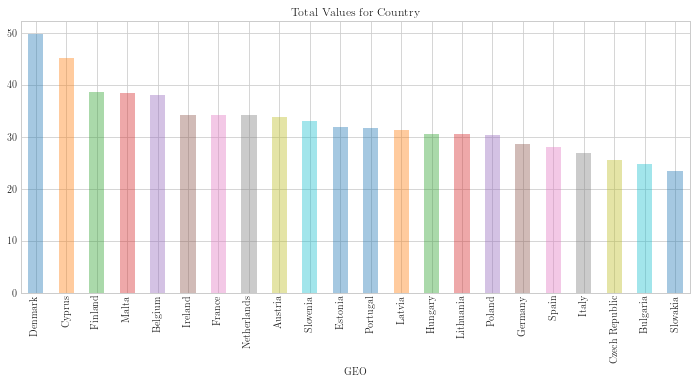

In [34]:
fig = plt.figure(figsize=(12, 5))
totalSum = pivedu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar', style='b', alpha=0.4,
              title='Total Values for Country')
plt.savefig('Totalvalue_Country.png', dpi=300, bbox_inches='tight')

También es posible trazar un DataFrame directamente. En este caso, cada columna se trata como una serie separada. Por ejemplo, en lugar de imprimir el valor acumulado a lo largo de los años, podemos trazar el valor de cada año.


En este caso, hemos utilizado un diagrama de barras horizontales (`kind = 'barh'`) acumulando todos los años en la misma barra de país. Esto puede hacerse configurando el parámetro **stacked** como `True`. La cantidad de colores predeterminados en un trazado es solo 5, por lo tanto, si tiene más de 5 Series para mostrar, debe especificar más colores o, de lo contrario, se volverá a utilizar el mismo conjunto de colores. Podemos establecer un nuevo conjunto de colores usando la palabra clave **color** con una lista de colores. Los colores básicos tienen un código de un solo carácter asignado a cada uno, por ejemplo, 'b' es para azul, 'r' para rojo, 'g' para verde, 'y' para amarillo, 'm' para magenta y 'c' para cian Cuando se muestran varias Series en un diagrama, se crea una leyenda para identificar cada una. El nombre de cada serie es el nombre de la columna en el DataFrame. Por defecto, la leyenda va dentro del área de trazado. Si queremos cambiar esto, podemos usar la función **legend** del objeto axis (este es el objeto que se devuelve cuando se llama a la función plot). Al usar la palabra clave **loc**, podemos establecer la posición relativa de la leyenda con respecto a la gráfica. Puede ser una combinación de derecha o izquierda y superior, inferior o central. Con **bbox_to_anchor** podemos establecer una posición absoluta con respecto a la trama, lo que nos permite colocar la leyenda fuera del gráfico.


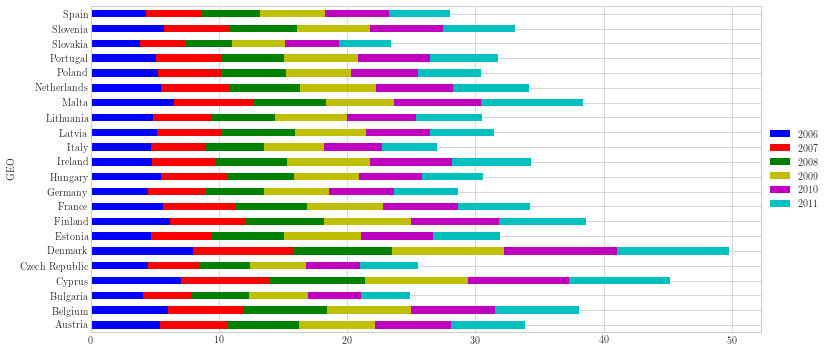

In [35]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu.plot(kind='barh', stacked=True, color=my_colors, figsize=(12, 6))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Value_Time_Country.png', dpi=300, bbox_inches='tight')

# Mayor información
Pandas tiene muchas más funcionalidades. Consulte la documentación de pandas (muy legibles) si desea obtener más información:
http://pandas.pydata.org/pandas-docs/stable/